In a matching problem, two or more points are matched and total distance of these matches is targetted to minimize. In this example, we have 3 models. First model aims to minimize total distance, second aims to minimize maxiumum distance between particular points, and last model aims to firstly minimize maximun distance and then minimize total distance of matches by depending on first objective. Last model is a multi objective model. You can make out diffrences through checking three graphs in detail. You can find detais in this link: https://yetanothermathprogrammingconsultant.blogspot.com/search?q=matching

In [1]:
import gurobipy as gb
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

In [2]:
n = 98 #must be even number, otherwise model turns out to be infeasible
koordinat = np.random.randint(2,150,(n,2))
A = scipy.spatial.distance.cdist(koordinat,koordinat) 
dm = { (i,j): A[i,j] for i in range(n) for j in range(n)}

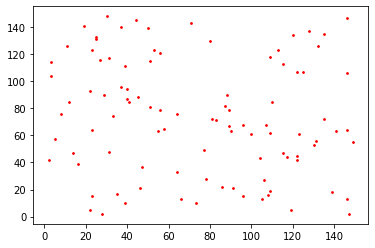

In [3]:
plt.scatter (koordinat[:,0:1],koordinat[:,1:2],s = 3, c = "r" )
plt.show()

In [4]:
mdl = gb.Model("Matching")

Using license file C:\Users\aakgul\gurobi.lic
Academic license - for non-commercial use only - expires 2021-06-23


In [5]:
x = mdl.addVars(n,n, vtype = gb.GRB.BINARY, name = "Xij")

In [6]:
mdl.setObjective(gb.quicksum(x[i,j]*dm[i,j] for i in range(n) for j in range(n)))

In [7]:
mdl.addConstrs(gb.quicksum(x[i,j] for j in range(n) if j > i) + gb.quicksum(x[j,i] for j in range(n) if i > j) == 1
              for i in range(n))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [8]:
mdl.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 98 rows, 9604 columns and 9506 nonzeros
Model fingerprint: 0xa00ced18
Variable types: 0 continuous, 9604 integer (9604 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4058.9823356
Presolve removed 0 rows and 4851 columns
Presolve time: 0.02s
Presolved: 98 rows, 4753 columns, 9506 nonzeros
Variable types: 0 continuous, 4753 integer (4753 binary)

Root relaxation: objective 4.722805e+02, 101 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  472.28046    0   18 4058.98234  472.28046  88.4%     -    0s
H    0     0                     572.7344408  

In [10]:
mdl.printAttr("X")


    Variable            X 
-------------------------
   Xij[0,16]            1 
   Xij[1,30]            1 
   Xij[2,48]            1 
   Xij[3,93]            1 
   Xij[4,70]            1 
   Xij[5,23]            1 
   Xij[6,15]            1 
   Xij[7,66]            1 
   Xij[8,74]            1 
   Xij[9,94]            1 
  Xij[10,67]            1 
  Xij[11,89]            1 
  Xij[12,80]            1 
  Xij[13,96]            1 
  Xij[14,53]            1 
  Xij[17,75]            1 
  Xij[18,59]            1 
  Xij[19,68]            1 
  Xij[20,86]            1 
  Xij[21,69]            1 
  Xij[22,34]            1 
  Xij[24,32]            1 
  Xij[25,37]            1 
  Xij[26,28]            1 
  Xij[27,33]            1 
  Xij[29,43]            1 
  Xij[31,65]            1 
  Xij[35,63]            1 
  Xij[36,61]            1 
  Xij[38,58]            1 
  Xij[39,88]            1 
  Xij[40,54]            1 
  Xij[41,51]            1 
  Xij[42,81]            1 
  Xij[44,73]            1 
 

In [11]:
matches = [a for a in x if x[a].x >= 0.99]

In [23]:
maximum_distance = max([dm[i] for i in matches]) #maximum distance in the first model

In [24]:
maximum_distance

33.734255586866

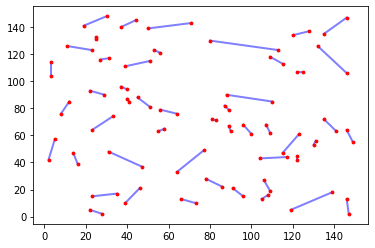

In [15]:
#plt.figure(figsize=(12,8))
xc = np.array(koordinat[:,0:1])
yc = np.array(koordinat[:,1:2])
for i,j in matches:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='b', zorder=0,linewidth=2,alpha=0.5)#alpha tansparancy
plt.scatter(xc[0:], yc[0:], c='r',s = 8)#s marker size
plt.show()

In [16]:
mdl1 = gb.Model("Matching_1")

In [17]:
x = mdl1.addVars(n,n, vtype = gb.GRB.BINARY, name = "Xij")
Z = mdl1.addVar(name = "Zmax")

In [18]:
mdl1.setObjective(Z)

In [19]:
mdl1.addConstrs(gb.quicksum(x[i,j] for j in range(n) if j > i) + gb.quicksum(x[j,i] for j in range(n) if i > j) == 1
              for i in range(n))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [20]:
mdl1.addConstrs(x[i,j]*dm[i,j] <= Z for i in range(n) for j in range(n) if j > i)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model Update*>,
 (0, 20): <gurobi.Constr *Awaiting Model

In [21]:
mdl1.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4851 rows, 9605 columns and 19012 nonzeros
Model fingerprint: 0xf739d0a6
Variable types: 1 continuous, 9604 integer (9604 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 158.8080602
Presolve removed 187 rows and 4881 columns
Presolve time: 0.13s
Presolved: 4664 rows, 4724 columns, 18673 nonzeros
Variable types: 1 continuous, 4723 integer (4723 binary)

Root relaxation: objective 1.026559e+01, 7589 iterations, 0.63 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.26559    0  765  158.80806   10.26559  93.5%     -    1s
H    0     0                     129.7

In [25]:
#maximum distance in the first model
maximum_distance

33.734255586866

In [26]:
matches_1 = [a for a in x if x[a].x >= 0.99]

In [28]:
totaldistance = sum([dm[i] for i in matches_1])#total distance of second model

In [29]:
totaldistance, mdl.getObjective().getValue()#total distance of second model and the first model. I sacrificed total distance
#to minimize maximum distance

(711.4726530730319, 511.5037186649146)

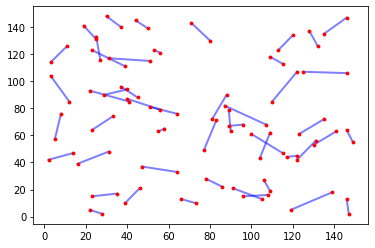

In [30]:
#plt.figure(figsize=(12,8))
xc = np.array(koordinat[:,0:1])
yc = np.array(koordinat[:,1:2])
for i,j in matches_1:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='b', zorder=0,linewidth=2,alpha=0.5)#alpha tansparancy
plt.scatter(xc[0:], yc[0:], c='r',s = 8)#s marker size
plt.show()

In [40]:
mdl2 = gb.Model("Matching_MultiObj")#first minimize maximum distance and then minimize total distance. This is the modt appropriate 
#model for this problem

In [32]:
x = mdl2.addVars(n,n, vtype = gb.GRB.BINARY, name = "Xij")
Z = mdl2.addVar(name = "Zmax")

In [33]:
mdl2.setObjectiveN((gb.quicksum(x[i,j]*dm[i,j] for i in range(n) for j in range(n))),1,0,1)

In [34]:
mdl2.setObjectiveN((Z),0,1,1)

In [35]:
mdl2.addConstrs(gb.quicksum(x[i,j] for j in range(n) if j > i) + gb.quicksum(x[j,i] for j in range(n) if i > j) == 1
              for i in range(n))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [36]:
mdl2.addConstrs(x[i,j]*dm[i,j] <= Z for i in range(n) for j in range(n) if j > i)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model Update*>,
 (0, 20): <gurobi.Constr *Awaiting Model

In [37]:
mdl2.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4851 rows, 9605 columns and 19012 nonzeros
Model fingerprint: 0x20ffef76
Variable types: 1 continuous, 9604 integer (9604 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve time: 0.03s
Presolved: 4851 rows and 9605 columns
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 () ...
---------------------------------

In [38]:
matches_2 = [a for a in x if x[a].x >= 0.99]

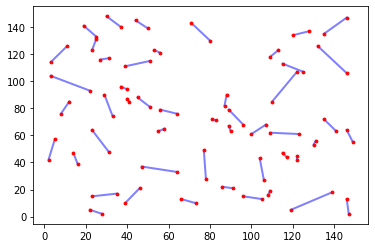

In [39]:
#plt.figure(figsize=(12,8))
xc = np.array(koordinat[:,0:1])
yc = np.array(koordinat[:,1:2])
for i,j in matches_2:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='b', zorder=0,linewidth=2,alpha=0.5)#alpha tansparancy
plt.scatter(xc[0:], yc[0:], c='r',s = 8)#s marker size
plt.show()